<p align="center">
  <img src="assets/wine_quality.jpg" alt="wine quality">
</p>

# Predicción de la calidad del vino mediante Machine Learning

---

Bienvenidos a este nuevo análisis de datos. En este notebook, vamos a explorar un conjunto de datos muy conocido en la comunidad de Data Science: el dataset de calidad del vino. Este dataset contiene una serie de características químicas de diferentes vinos, junto con una calificación de calidad para cada uno.

El objetivo de nuestro análisis es desarrollar un modelo de Machine Learning que pueda predecir la calidad del vino basándose en estas características. Este tipo de modelos pueden ser extremadamente útiles en la industria del vino, permitiendo a los productores predecir y optimizar la calidad de sus productos.

A lo largo de este notebook, intentaremos realizar un análisis exploratorio de los datos, preparar los datos para el modelado, entrenaremos varios modelos de Machine Learning y evaluaremos su rendimiento. 

Esperamos que encuentren este análisis interesante y útil. ¡Comencemos!

## Importacion de bibliotecas y conjunto de datos 

A continuacion, importaremos las todas las bibliotecas necesarias para nuestro análisis y modelado:

- `numpy`: Nos proporciona una variedad de rutinas para operaciones rápidas en matrices y matematicas.
- `pandas`: Proporciona estructuras para los datos y herramientas de análisis de alto rendimiento y fáciles de usar.
- `matplotlib` y `seaborn`: se utilizaran para visualizar los datos. Nos ayudarán a entender mejor las características y la distribución de los datos.
- `sklearn`: Es un modulo con varias bibliotecas instaladas, nos interesara el trabajo con variaos modelos y medios de evaluacion.
- `XGBoost`: Es una biblioteca optimizada de gradient boosting. Vamos a utilizar su clasificador.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

Ahora que hemos importado las bibliotecas necesarias, el siguiente paso es importar nuestro conjunto de datos. 

In [2]:
df = pd.read_csv('data/winequalityN.csv')

## Exploración Inicial de los datos

Una vez que hemos importado el conjunto de datos, podemos echar un vistazo a las primeras filas para tener una idea de la información que contiene.

In [3]:
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Como podemos observar, cada fila representa un vino diferente, y las columnas representan las características de ese vino, incluyendo su tipo (blanco o tinto), varios atributos químicos, y una calificación de calidad:

1. `type`: Se refiere al tipo de vino. En nuestro conjunto de datos, todos los 6497 vinos tienen un tipo especificado (blanco o tinto).
2. `fixed acidity`: Se refiere a los ácidos que no se evaporan fácilmente.
3. `volatile acidity`: Es una medida de la cantidad de ácidos volátiles o gaseosos en el vino.
4. `citric acid`: Es uno de los ácidos principales presentes en las uvas.
5. `residual sugar`: Se refiere a la cantidad de azúcar que queda después de que la fermentación ha terminado. 
6. `chlorides`: Son la cantidad de sal en el vino.
7. `free sulfur dioxide`: El dióxido de azufre se utiliza en la vinificación para prevenir el crecimiento de microorganismos y la oxidación del vino.
8. `total sulfur dioxide`: Es la suma del dióxido de azufre libre y el dióxido de azufre unido.
9. `density`: Es una medida de la cantidad de masa por unidad de volumen en el vino.
10. `pH`: Es una medida de la acidez o alcalinidad del vino.
11. `sulphates`: Los sulfatos en el vino pueden contribuir a los niveles de dióxido de azufre.
12. `alcohol`: Es el contenido de volumen alcoholico del vino.
13. `quality`: Es una medida de la calidad del vino, seran valorados con una nota del 1 al 9.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


El método `describe()` nos ofrece un panorama estadístico que nos permite hacer ya algunas observaciones iniciales:

1. En cuanto a la `acidez fija`, la mayoría de los vinos se sitúan entre 6.4 y 7.7 g/dm³. Sin embargo, hay algunos que llegan hasta 15.9 g/dm³, lo que indica una acidez bastante elevada.
2. La `acidez volátil` promedio es de 0.34 g/dm³, pero hay vinos que alcanzan hasta 1.58 g/dm³. Esto podría sugerir un sabor fuertemente avinagrado en algunos casos.
3. Respecto al `ácido cítrico`, la mayoría de los vinos tienen un contenido que oscila entre 0.25 y 0.39 g/dm³, aunque algunos llegan a los 1.66 g/dm³.
4. Algunos vinos presentan un `azúcar residual` bastante alto, llegando hasta 65.8 g/dm³, lo que podría traducirse en sabores muy dulces.
5. En relación a los `cloruros`, la mayoría de los vinos tienen un contenido entre 0.038 y 0.065 g/dm³. Sin embargo, hay vinos con hasta 0.611 g/dm³, lo que podría dar lugar a sabores salados.
6. Algunos vinos muestran un `dióxido de azufre libre` de hasta 289 mg/dm³, lo que podría indicar una mayor conservación y una vida útil más larga.
7. En cuanto al `dióxido de azufre total`, hay vinos que alcanzan hasta 440 mg/dm³, lo que también podría sugerir una mejor conservación y una vida útil más larga.
8. La mayoría de los vinos tienen una `densidad` entre 0.9923 y 0.9970 g/cm³, pero algunos llegan hasta 1.039 g/cm³.
9. En términos de `pH`, la mayoría de los vinos se encuentran entre 3.11 y 3.32. Sin embargo, algunos alcanzan un pH de hasta 4.01, lo que podría indicar un sabor más amargo.
10. Tenemos vinos con un contenido de `sulfatos` de hasta 2.00 g/dm³, lo que podría indicar una mayor conservación y una vida útil más larga.
11. La mayoría de los vinos tienen un contenido de `alcohol` entre 9.5% y 11.3%, pero algunos vinos llegan hasta el 14.9%.
12. En cuanto a la `calidad`, los vinos en este conjunto de datos varían de 3 a 9, con una media de 5.8 y una mediana de 6. Esto sugiere que la mayoría de los vinos son de calidad media a buena.

## Preparacion de los datos

En esta sección, nos centraremos en preparar nuestros datos para el análisis y el modelado. 

La preparación de los datos es un paso crucial. Incluye limpiar los datos, tratar los valores faltantes, convertir las variables categóricas en un formato que los modelos de ML puedan entender y, a veces, crear nuevas variables a partir de las existentes. Este proceso puede tener un gran impacto en la calidad de los resultados finales, ya que los modelos dependen en gran medida de la calidad de los datos de entrada.

### - Preprocesamiento de datos

Trabajaremos con `LabelEncoder` para convertir las etiquetas categóricas de `type` en una forma numérica interpretable para el modelo.

In [11]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### - Tratamiento de valores nulos

Ahora procederemos a identificar y tratar adecuadamente los valores nulos o faltantes.

In [12]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Una estrategia común utilizada es reemplazar los valores nulos con la media de los valores no nulos en la misma columna. Sin embargo, esta estrategia puede no ser ideal si los datos están sesgados o si hay valores atípicos, ya que estos pueden distorsionar la media.

Por eso, en este caso, estoy considerando utilizar el método k-Nearest Neighbors (k-NN) para imputar los valores nulos. 

El método k-NN identifica los ‘k’ puntos de datos más cercanos a la observación con el valor nulo y utiliza estos puntos de datos para imputar el valor. La ventaja de usar k-NN sobre la media es que puede capturar patrones más complejos en los datos, lo que puede resultar en una imputación más precisa.

In [13]:
imputer = KNNImputer(n_neighbors=5)

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Graficado de los datos

Ahora vamos a visualizar nuestros datos para obtener una mejor comprensión de las características y su relación con nuestra variable objetivo, que es `quality`.

La calidad del vino es nuestra principal preocupación en este análisis, ya que estamos interesados en predecir cómo las diferentes características químicas del vino pueden influir en su calidad. Al centrarnos en esta característica, podemos identificar qué factores contribuyen más a un vino de alta calidad y utilizar esta información para mejorar la producción de vino en el futuro.

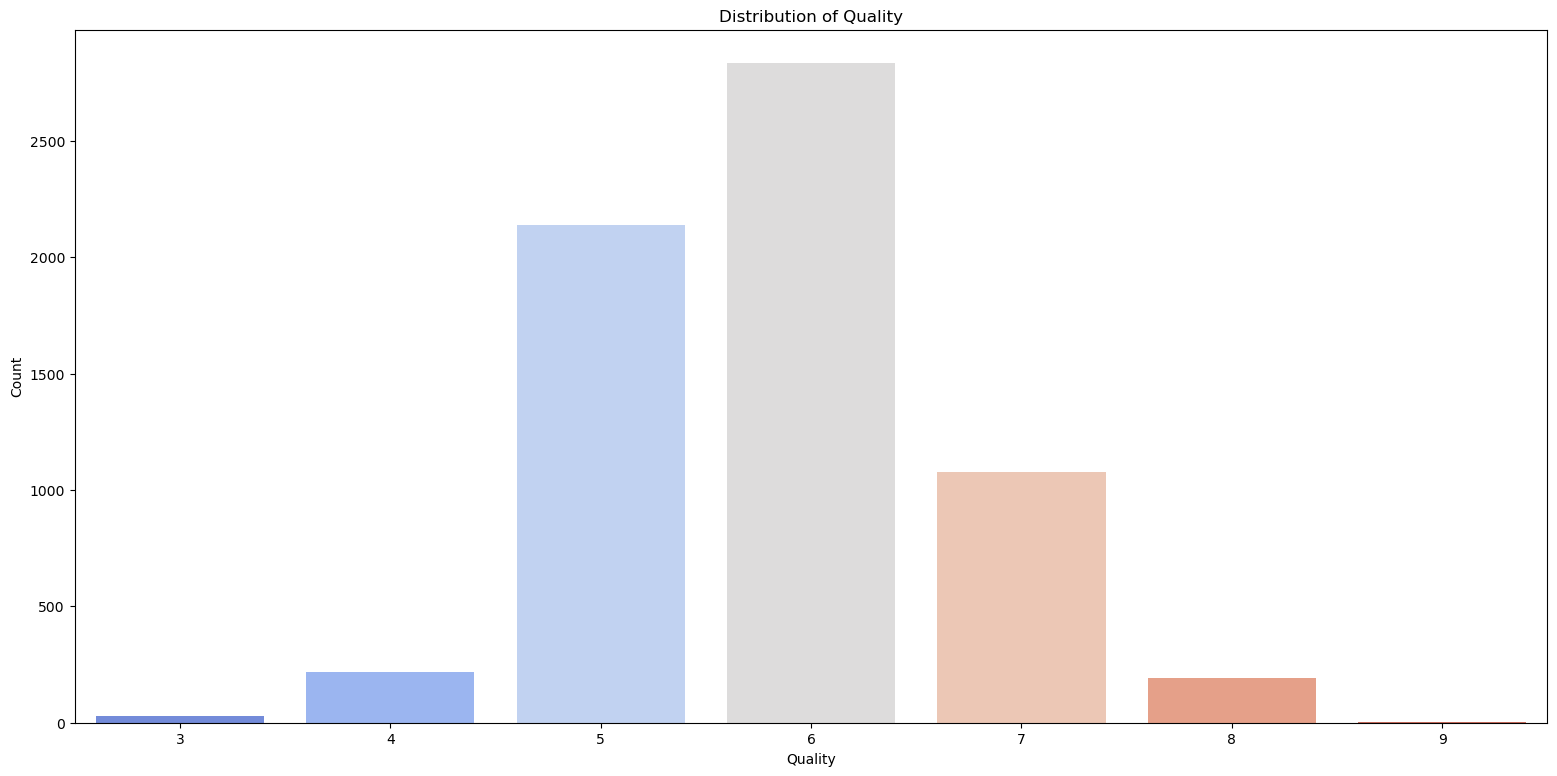

In [7]:
plt.figure(figsize=(19, 9))

sns.countplot(x='quality', data=df, palette='coolwarm')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')

plt.show()

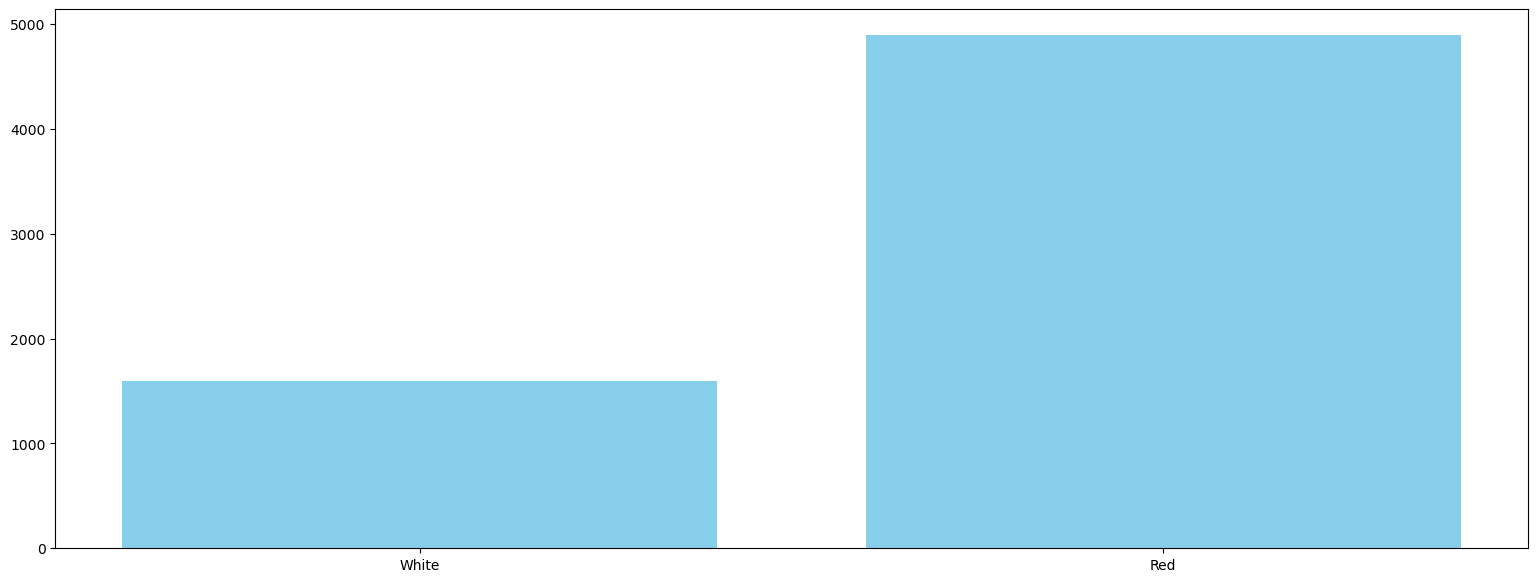

In [15]:
# sum type
type_sum = df['type'].value_counts()

# plot type
plt.figure(figsize=(19, 7))
plt.bar(type_sum.index, type_sum.values, color='skyblue')
plt.xticks(type_sum.index, ['Red', 'White'])
plt.show()

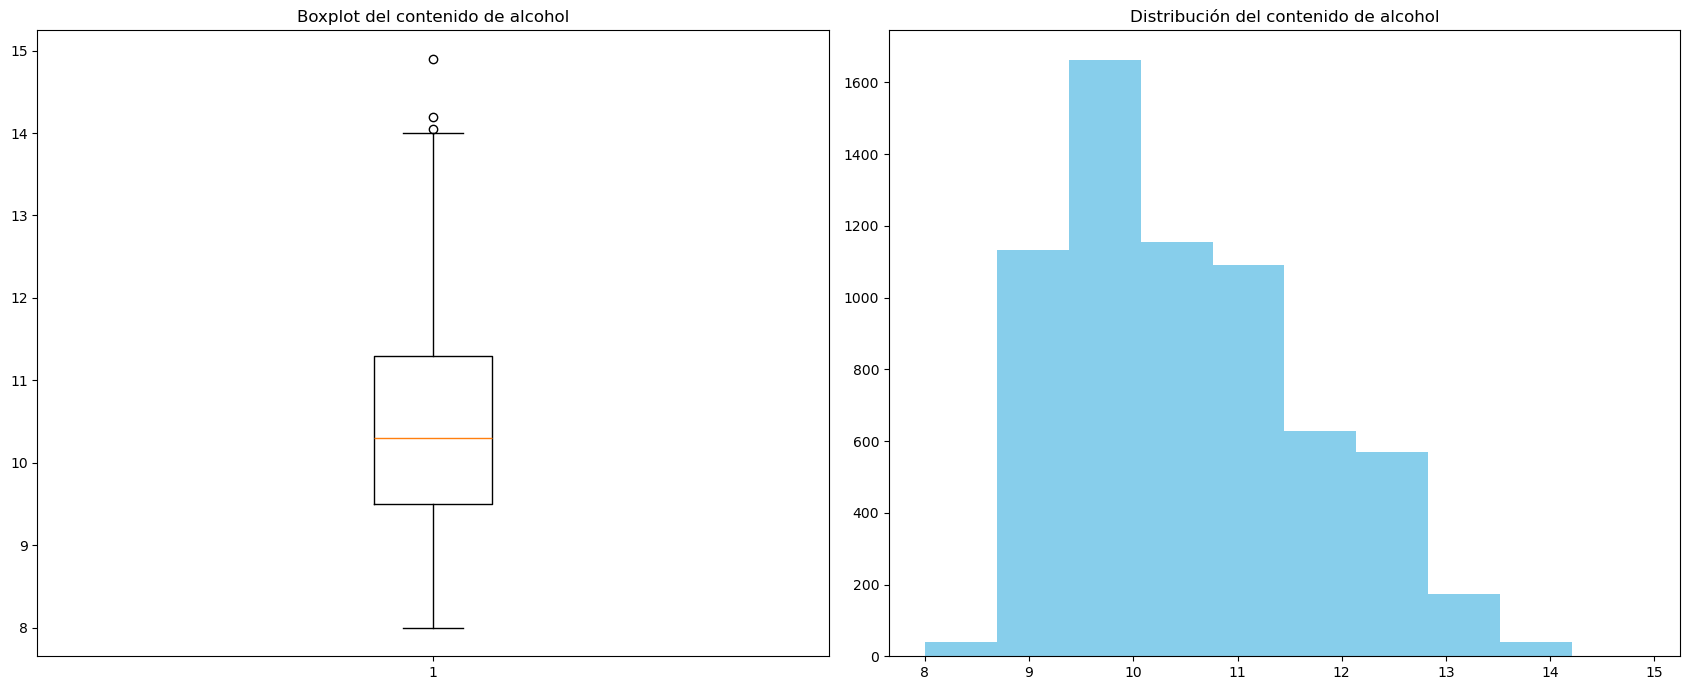

In [9]:
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)
plt.boxplot(df['alcohol'])
plt.title('Boxplot del contenido de alcohol')

plt.subplot(1, 2, 2)
plt.hist(df['alcohol'], bins=10, color='skyblue')
plt.title('Distribución del contenido de alcohol')

plt.tight_layout()
plt.show()

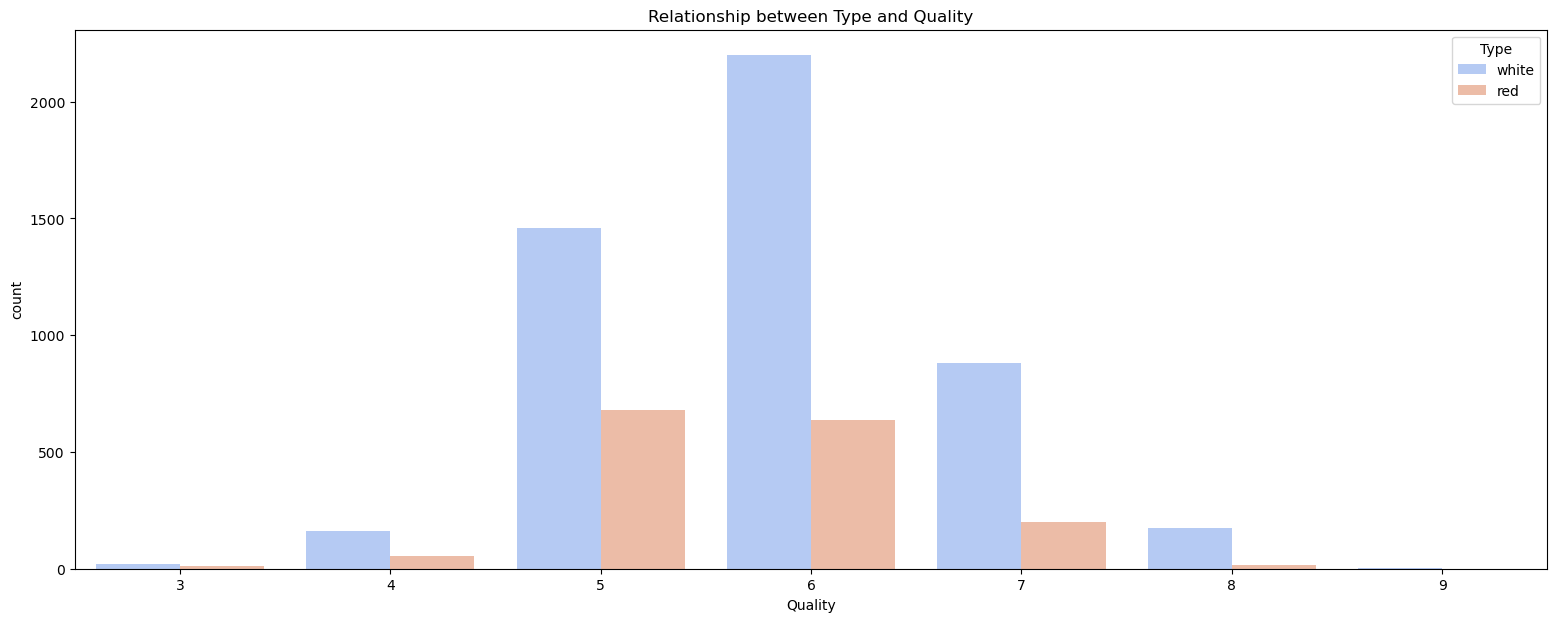

In [10]:
df['type'] = df['type'].astype(str)

plt.figure(figsize=(19, 7))

sns.countplot(x='quality', hue='type', data=df, palette='coolwarm')
plt.xlabel('Quality')
plt.title('Relationship between Type and Quality')
plt.legend(title='Type', loc='upper right')

plt.show()

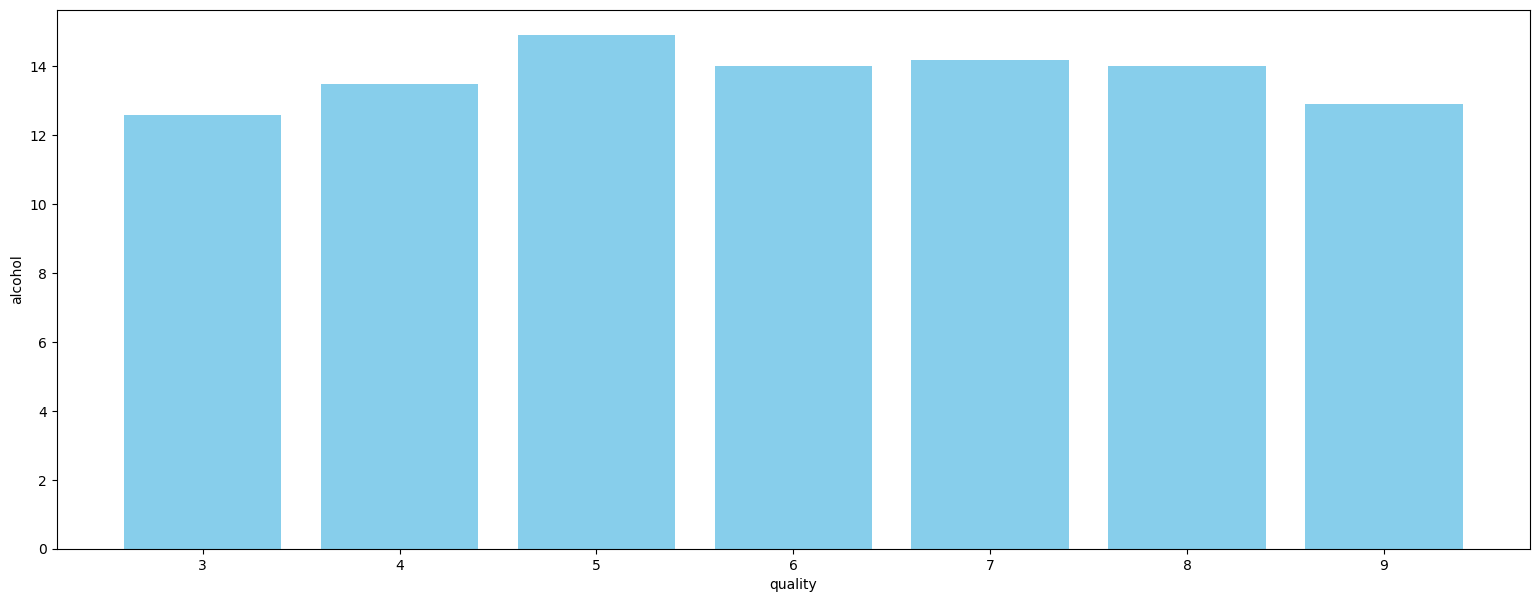

In [11]:
plt.figure(figsize=(19, 7))

plt.bar(df['quality'], df['alcohol'], color='skyblue')
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()

In [12]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [13]:
corr = df.corr()
corr

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.471644,0.700357,-0.390645,-0.328514,-0.486662,0.032970,0.119323
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,0.471644,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


Total de dióxido de azufre (total sulfur dioxide): Esta variable tiene una fuerte correlación positiva con la calidad del vino (0.70). Por lo tanto, sería relevante incluirla en el modelo.
Cloruros (chlorides): Aunque tiene una correlación negativa con la calidad (-0.20), su impacto no es tan fuerte como otras variables. Puede considerarse para el modelo, pero no es crítico.
Sulfatos (sulphates): Tiene una correlación positiva moderada con la calidad (0.44). Incluirlo podría ser beneficioso.
Alcohol: Aunque su correlación con la calidad es baja (0.04), es una característica importante en la producción de vino. Puede ser relevante para el modelo.
Acidez volátil (volatile acidity): Tiene una correlación negativa con la calidad (-0.27). Aunque no es tan fuerte, aún podría ser útil en el modelo.

Text(0.5, 1.0, 'Correlation Heatmap')

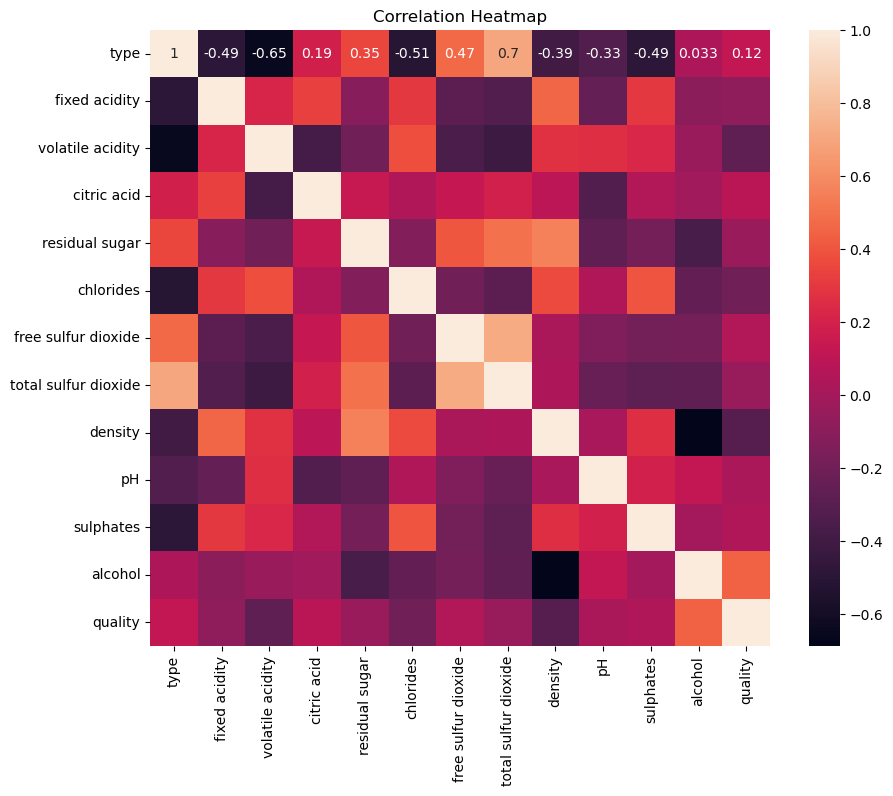

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')

para encontrar los mejores:

In [15]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [16]:
features = df.drop([ 'quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

print(f'Conjunto de entrenamiento: ',xtrain.shape, '\nConjunto de prueba: ', xtest.shape)

Conjunto de entrenamiento:  (5197, 12) 
Conjunto de prueba:  (1300, 12)


In [17]:
norm = MinMaxScaler()

xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [18]:
# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(xtrain, ytrain)

# Realizar predicciones en el conjunto de prueba
ypred = logistic_model.predict(xtest)

# Calcular la precisión del modelo
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, logistic_model.predict(xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, logistic_model.predict(xtest)))


Training Accuracy :  0.7024167074163331
Validation Accuracy :  0.7023835065027941


In [19]:
# Crear el modelo XGBClassifier
xgb_model = XGBClassifier()

# Entrenar el modelo
xgb_model.fit(xtrain, ytrain)

# Calcular la precisión del modelo
print('Training Accuracy:', metrics.roc_auc_score(ytrain, xgb_model.predict(xtrain)))
print('Validation Accuracy:', metrics.roc_auc_score(ytest, xgb_model.predict(xtest)))

Training Accuracy: 0.977221626684209
Validation Accuracy: 0.8037208446991756


In [20]:
# Crear el modelo SVC
svc_model = SVC(kernel='rbf')

# Entrenar el modelo
svc_model.fit(xtrain, ytrain)

# Calcular la precisión del modelo
print('Training Accuracy:', metrics.roc_auc_score(ytrain, svc_model.predict(xtrain)))
print('Validation Accuracy:', metrics.roc_auc_score(ytest, svc_model.predict(xtest)))


Training Accuracy: 0.7203202525576721
Validation Accuracy: 0.7101148333180086


In [21]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(ytest, ypred)

# Imprimir la matriz de confusión
print(cm)

[[259 215]
 [117 709]]
